### A simulation to understand transmission

Assumptions

1) 1 unit = 1 human step.

2) Movement of a person in an establishment is random.

3) A typical establishment contains 30 people and each person will take 500 steps

4) Person # 0 is the only infected person.

5) Person # 0 will infect another person if they visit the same 30 points during their random walk.

6) Movement of employees in office are represented by random walk of step size = 1 unit.




In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Define a function to check if an employee infects another employee

def check_intersection1(A,B):
    c = np.array([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in B)])
    interactions = 30 # Number of interactions
    if c.size > interactions:
        return True # infected when there is more than 30 interaction
    else:
        return False # not infected when less than 30 interactions

# Simulation 1


/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


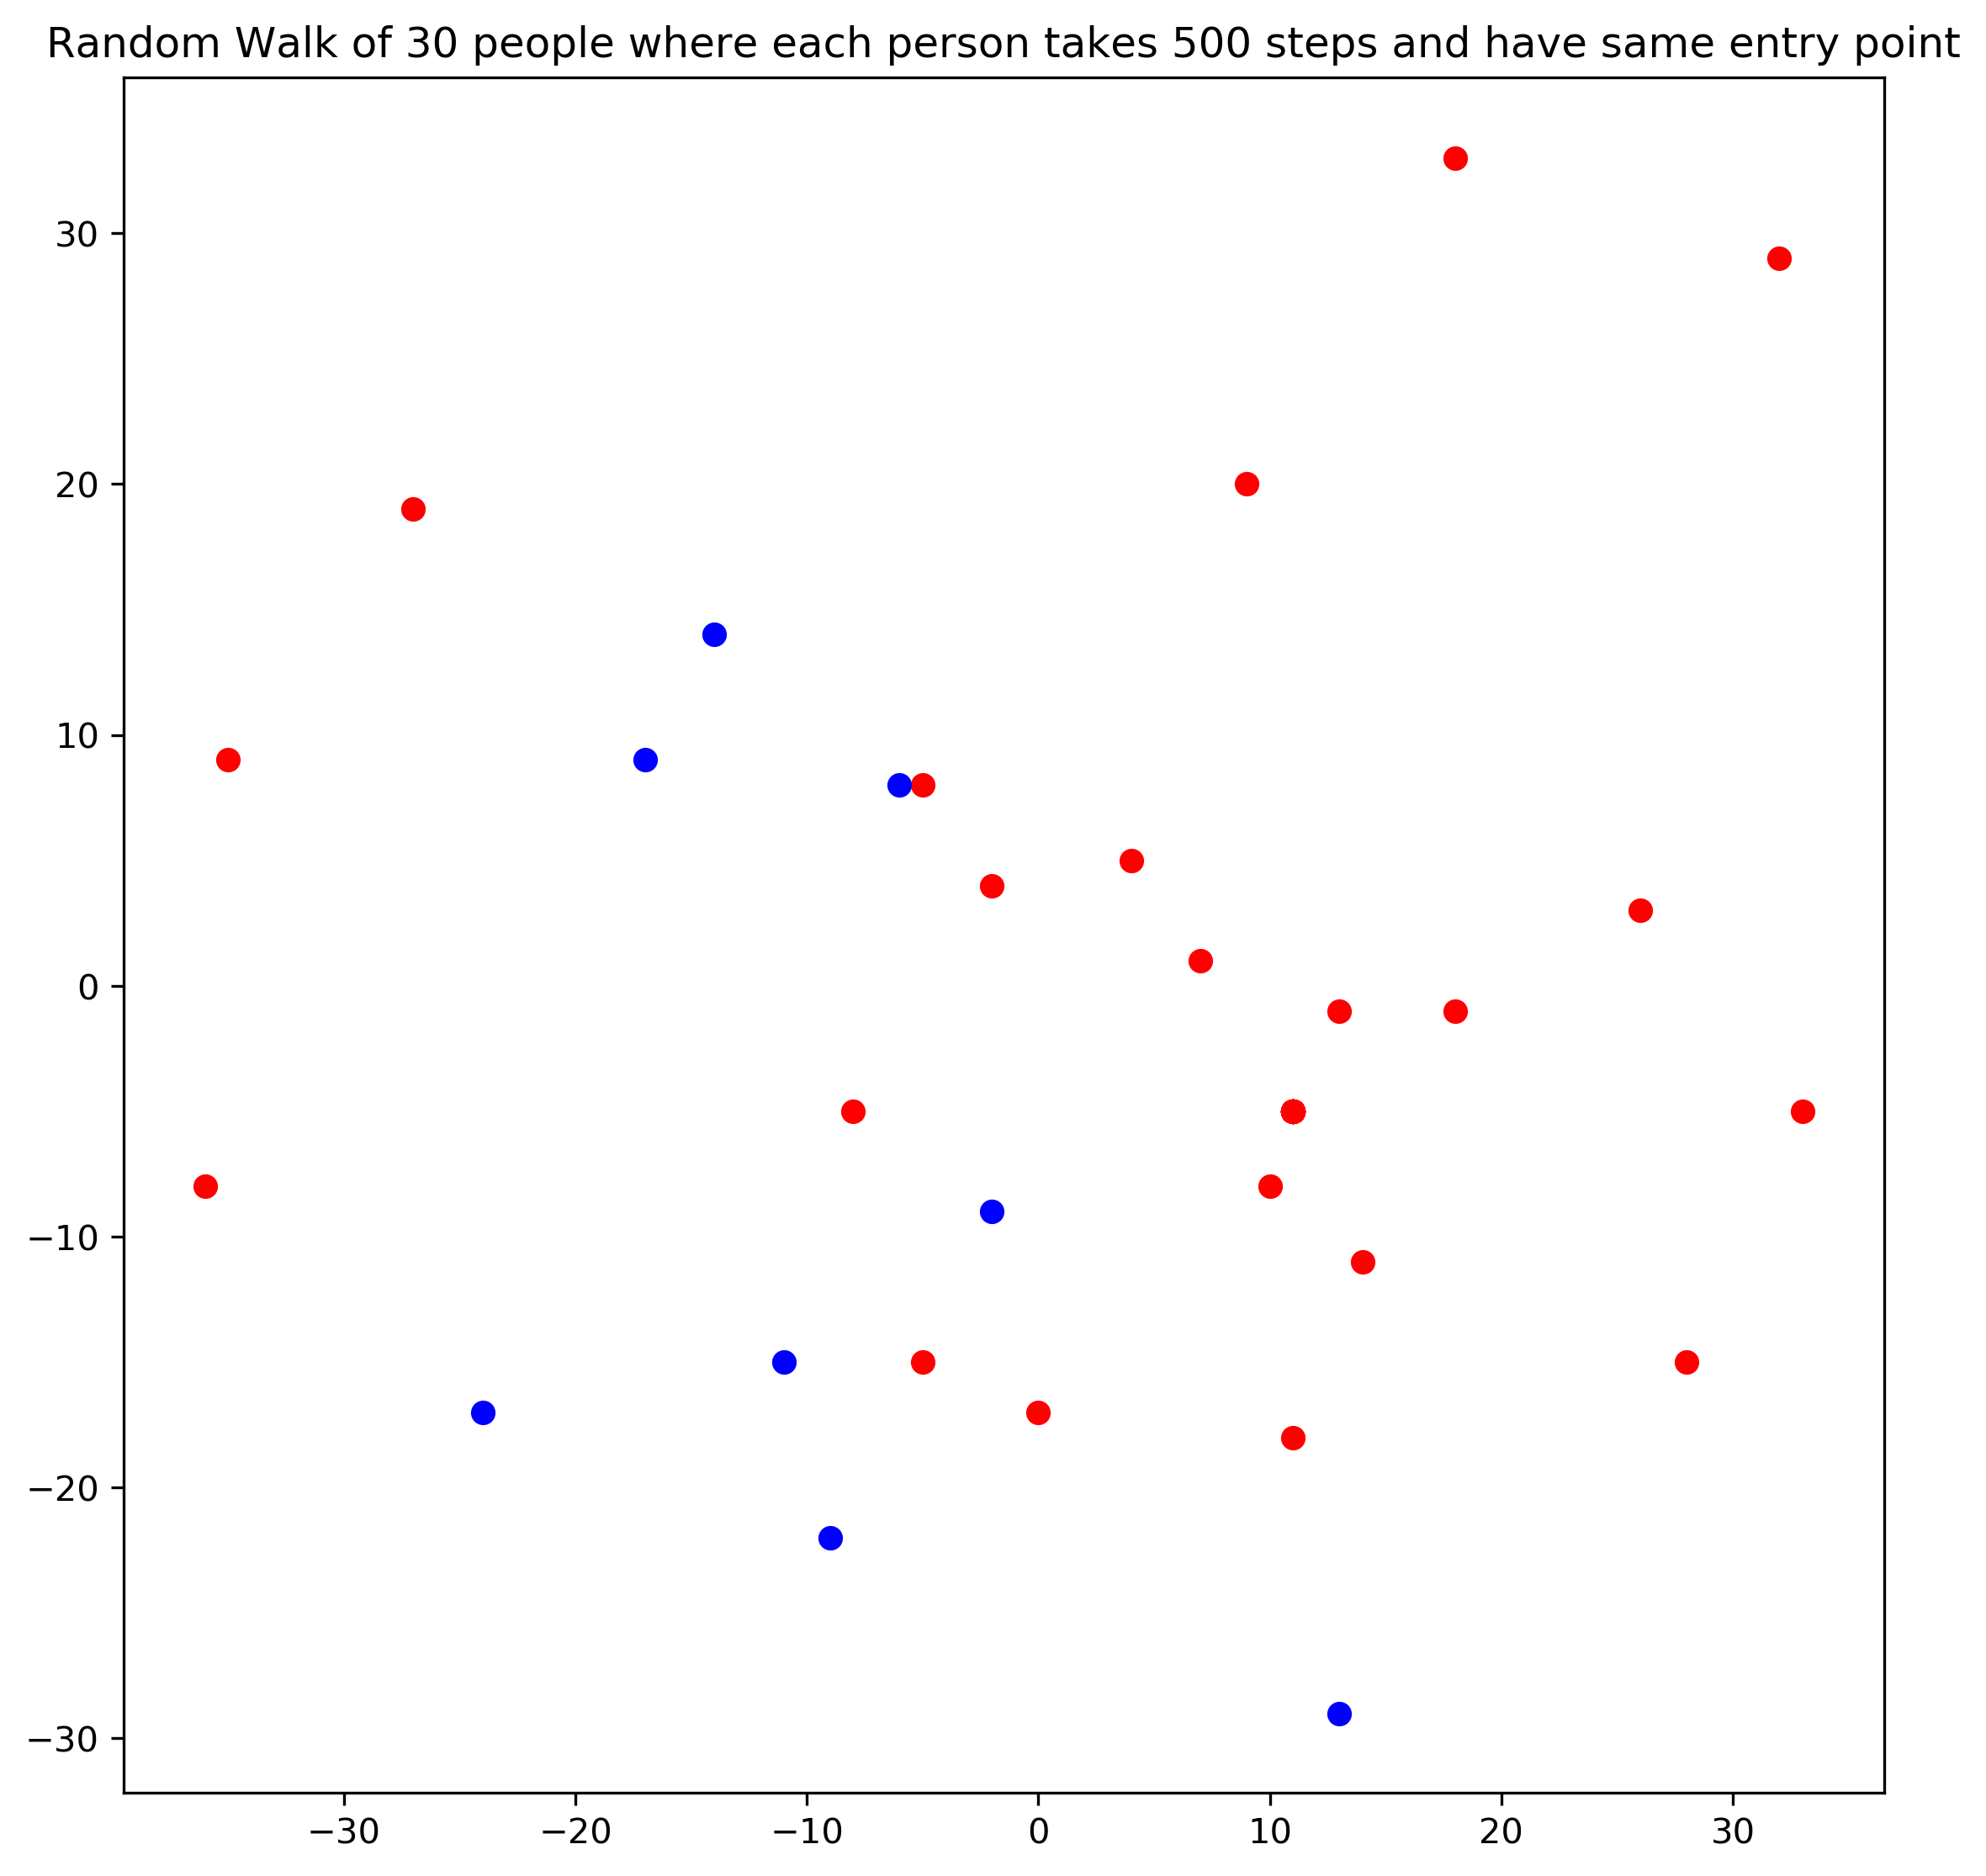

In [3]:

# Set up required variables for simulating 30 people in 500 x 500 space

dims = 2                   # Employees move in 2D space
step_n = 500                # Test for 500 steps per employee
employees = 30             # Test for 150 employees
step_set = [-1, 0, 1]       

origin = np.zeros((1,dims))

all_steps = np.zeros((step_n+1)*dims*employees).reshape((step_n+1,dims,employees))  # captures all steps

# Simulate the movement in a day in office


for i in range(employees):
   

    # Choose a origin point
    
    #x_origin = np.random.randint(-250,250)
    #y_origin = np.random.randint(-250,250)
    #origin = np.array([[x_origin,y_origin]])
    
    # Set origin to (0,0) i.e all people enter from the same door
    origin = np.array([[0,0]])
    # simuate movement 
    
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    
    # capture movement for all 30 people in all_steps 3D array
    all_steps[:,:,i] = path

# Plot to see who is infected. Person # 0 was infected. 

# blue dot represents not infected
# red dot represents infected


fig = plt.figure(figsize=(9,9),dpi=300)
plt.title('Random Walk of 30 people where each person takes 500 steps and have same entry point')

for i in range(1,employees):
    ax = fig.add_subplot(111)
    ax.scatter(all_steps[-1,0,0], all_steps[-1,1,0],c='red',marker = 'o')
    #if i==0:
        #ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='red',marker = 'o')
    #for j in range(1,employees):
        #if i != j:
    infected = check_intersection1(all_steps[:,:,0],all_steps[:,:,i])
            
    if infected:
        ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='red',marker = 'o')
    else:
        ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='blue',marker = 'o')
    



The above simulation shows that out of 30 employees, 19 get infected if each person takes 500 random steps.

Red dot - infected person

Blue dot - non infected person

Quite grim, lets try another scenario where people enter an establishment from different locations.

In the previous simulation everyone entered from the same door represented by (0,0)

I will next simulate entry from random points in 500 x 500 area and see how much the tranmission rate is affected.



# Simulation 2

/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


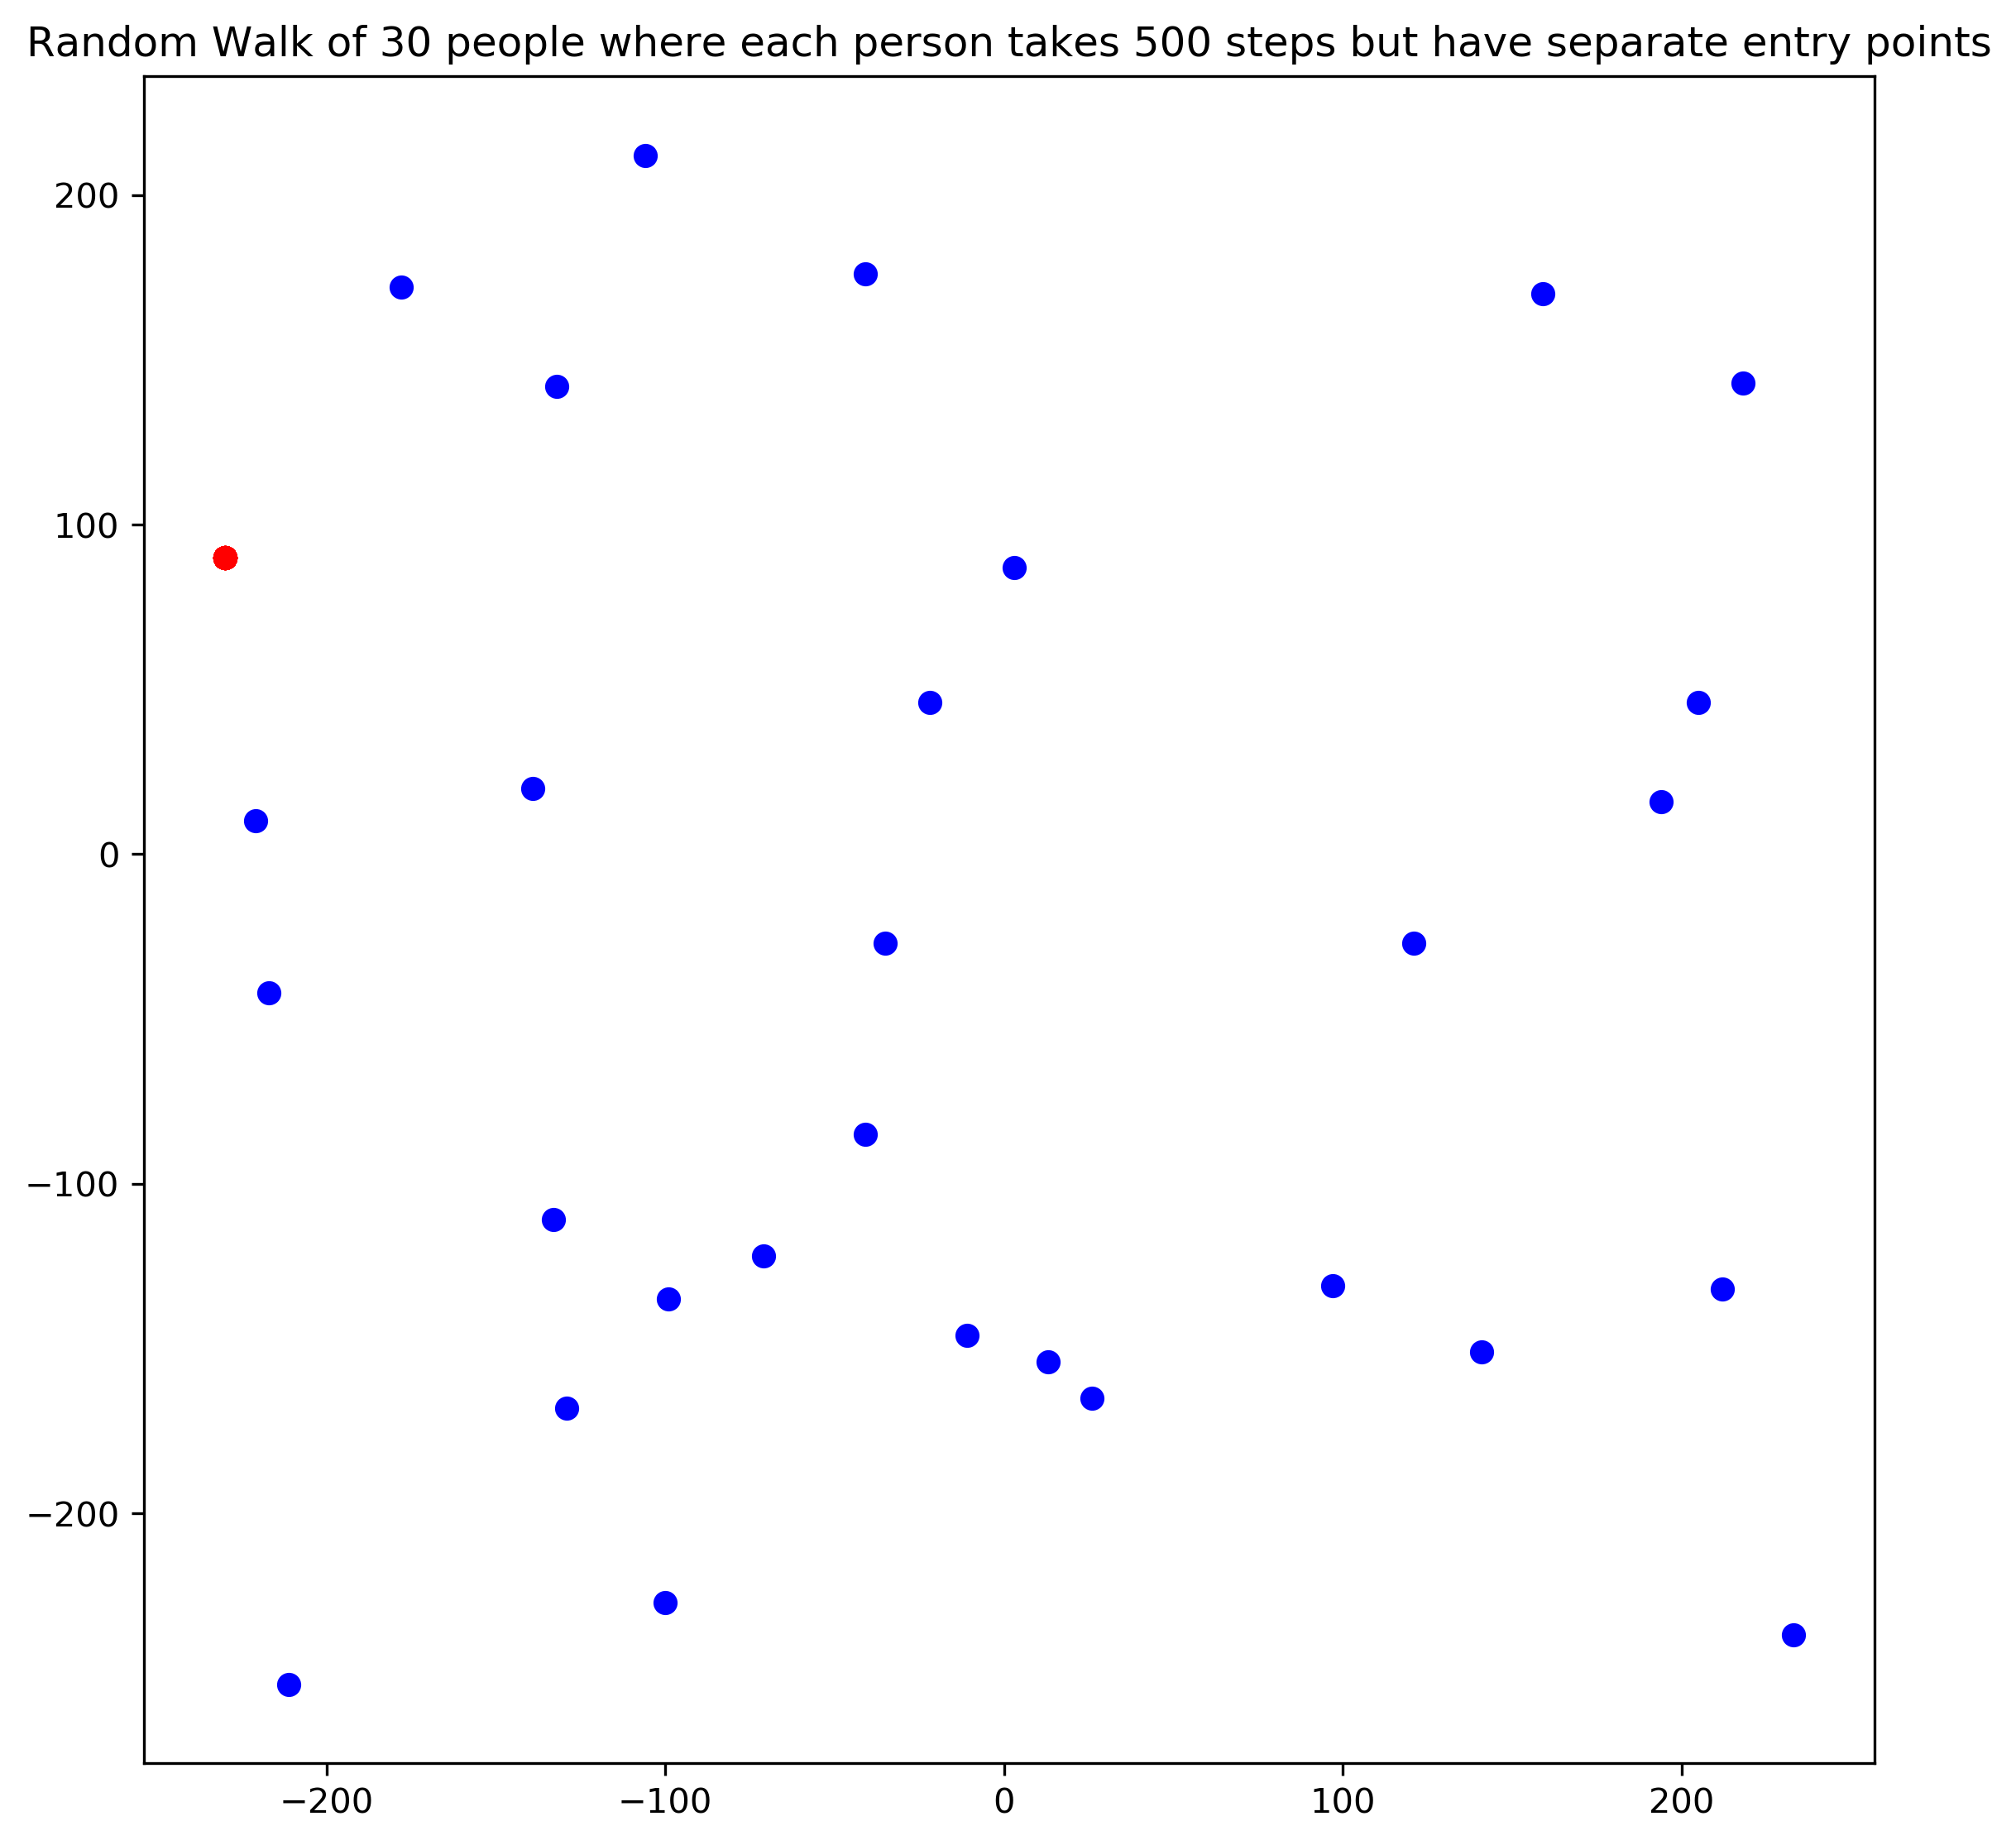

In [4]:
# Set up required variables for simulating 30 people in 500 x 500 space

dims = 2                   # Employees move in 2D space
step_n = 500                # Test for 500 steps per employee
employees = 30             # Test for 150 employees
step_set = [-1, 0, 1]       

origin = np.zeros((1,dims))

all_steps = np.zeros((step_n+1)*dims*employees).reshape((step_n+1,dims,employees))  # captures all steps

# Simulate the movement in a day in office


for i in range(employees):
   

    # Choose a origin point. The next 3 lines of code simluate random entry point in a 500 x 500 space
    
    x_origin = np.random.randint(-250,250)
    y_origin = np.random.randint(-250,250)
    origin = np.array([[x_origin,y_origin]])
    
    # Set origin to (0,0) i.e all people enter from the same door
    #origin = np.array([[0,0]])
    # simuate movement 
    
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    
    # capture movement for all 30 people in all_steps 3D array
    all_steps[:,:,i] = path

# Plot to see who is infected. Person # 0 was infected. 

# blue dot represents not infected
# red dot represents infected


fig = plt.figure(figsize=(9,9),dpi=300)
plt.title('Random Walk of 30 people where each person takes 500 steps but have separate entry points')

for i in range(1,employees):
    ax = fig.add_subplot(111)
    ax.scatter(all_steps[-1,0,0], all_steps[-1,1,0],c='red',marker = 'o')
    #if i==0:
        #ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='red',marker = 'o')
    #for j in range(1,employees):
        #if i != j:
    infected = check_intersection1(all_steps[:,:,0],all_steps[:,:,i])
            
    if infected:
        ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='red',marker = 'o')
    else:
        ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='blue',marker = 'o')
    




As you can see, the number of tranmission drop down to zero. the only red dot is person # 0 who was already infected

But have 30 different entry points for 30 people is not feasible

so lets run another simulation with 5 entry points to 500 x 500 area





# Simulation 3

/Users/adityanarvekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


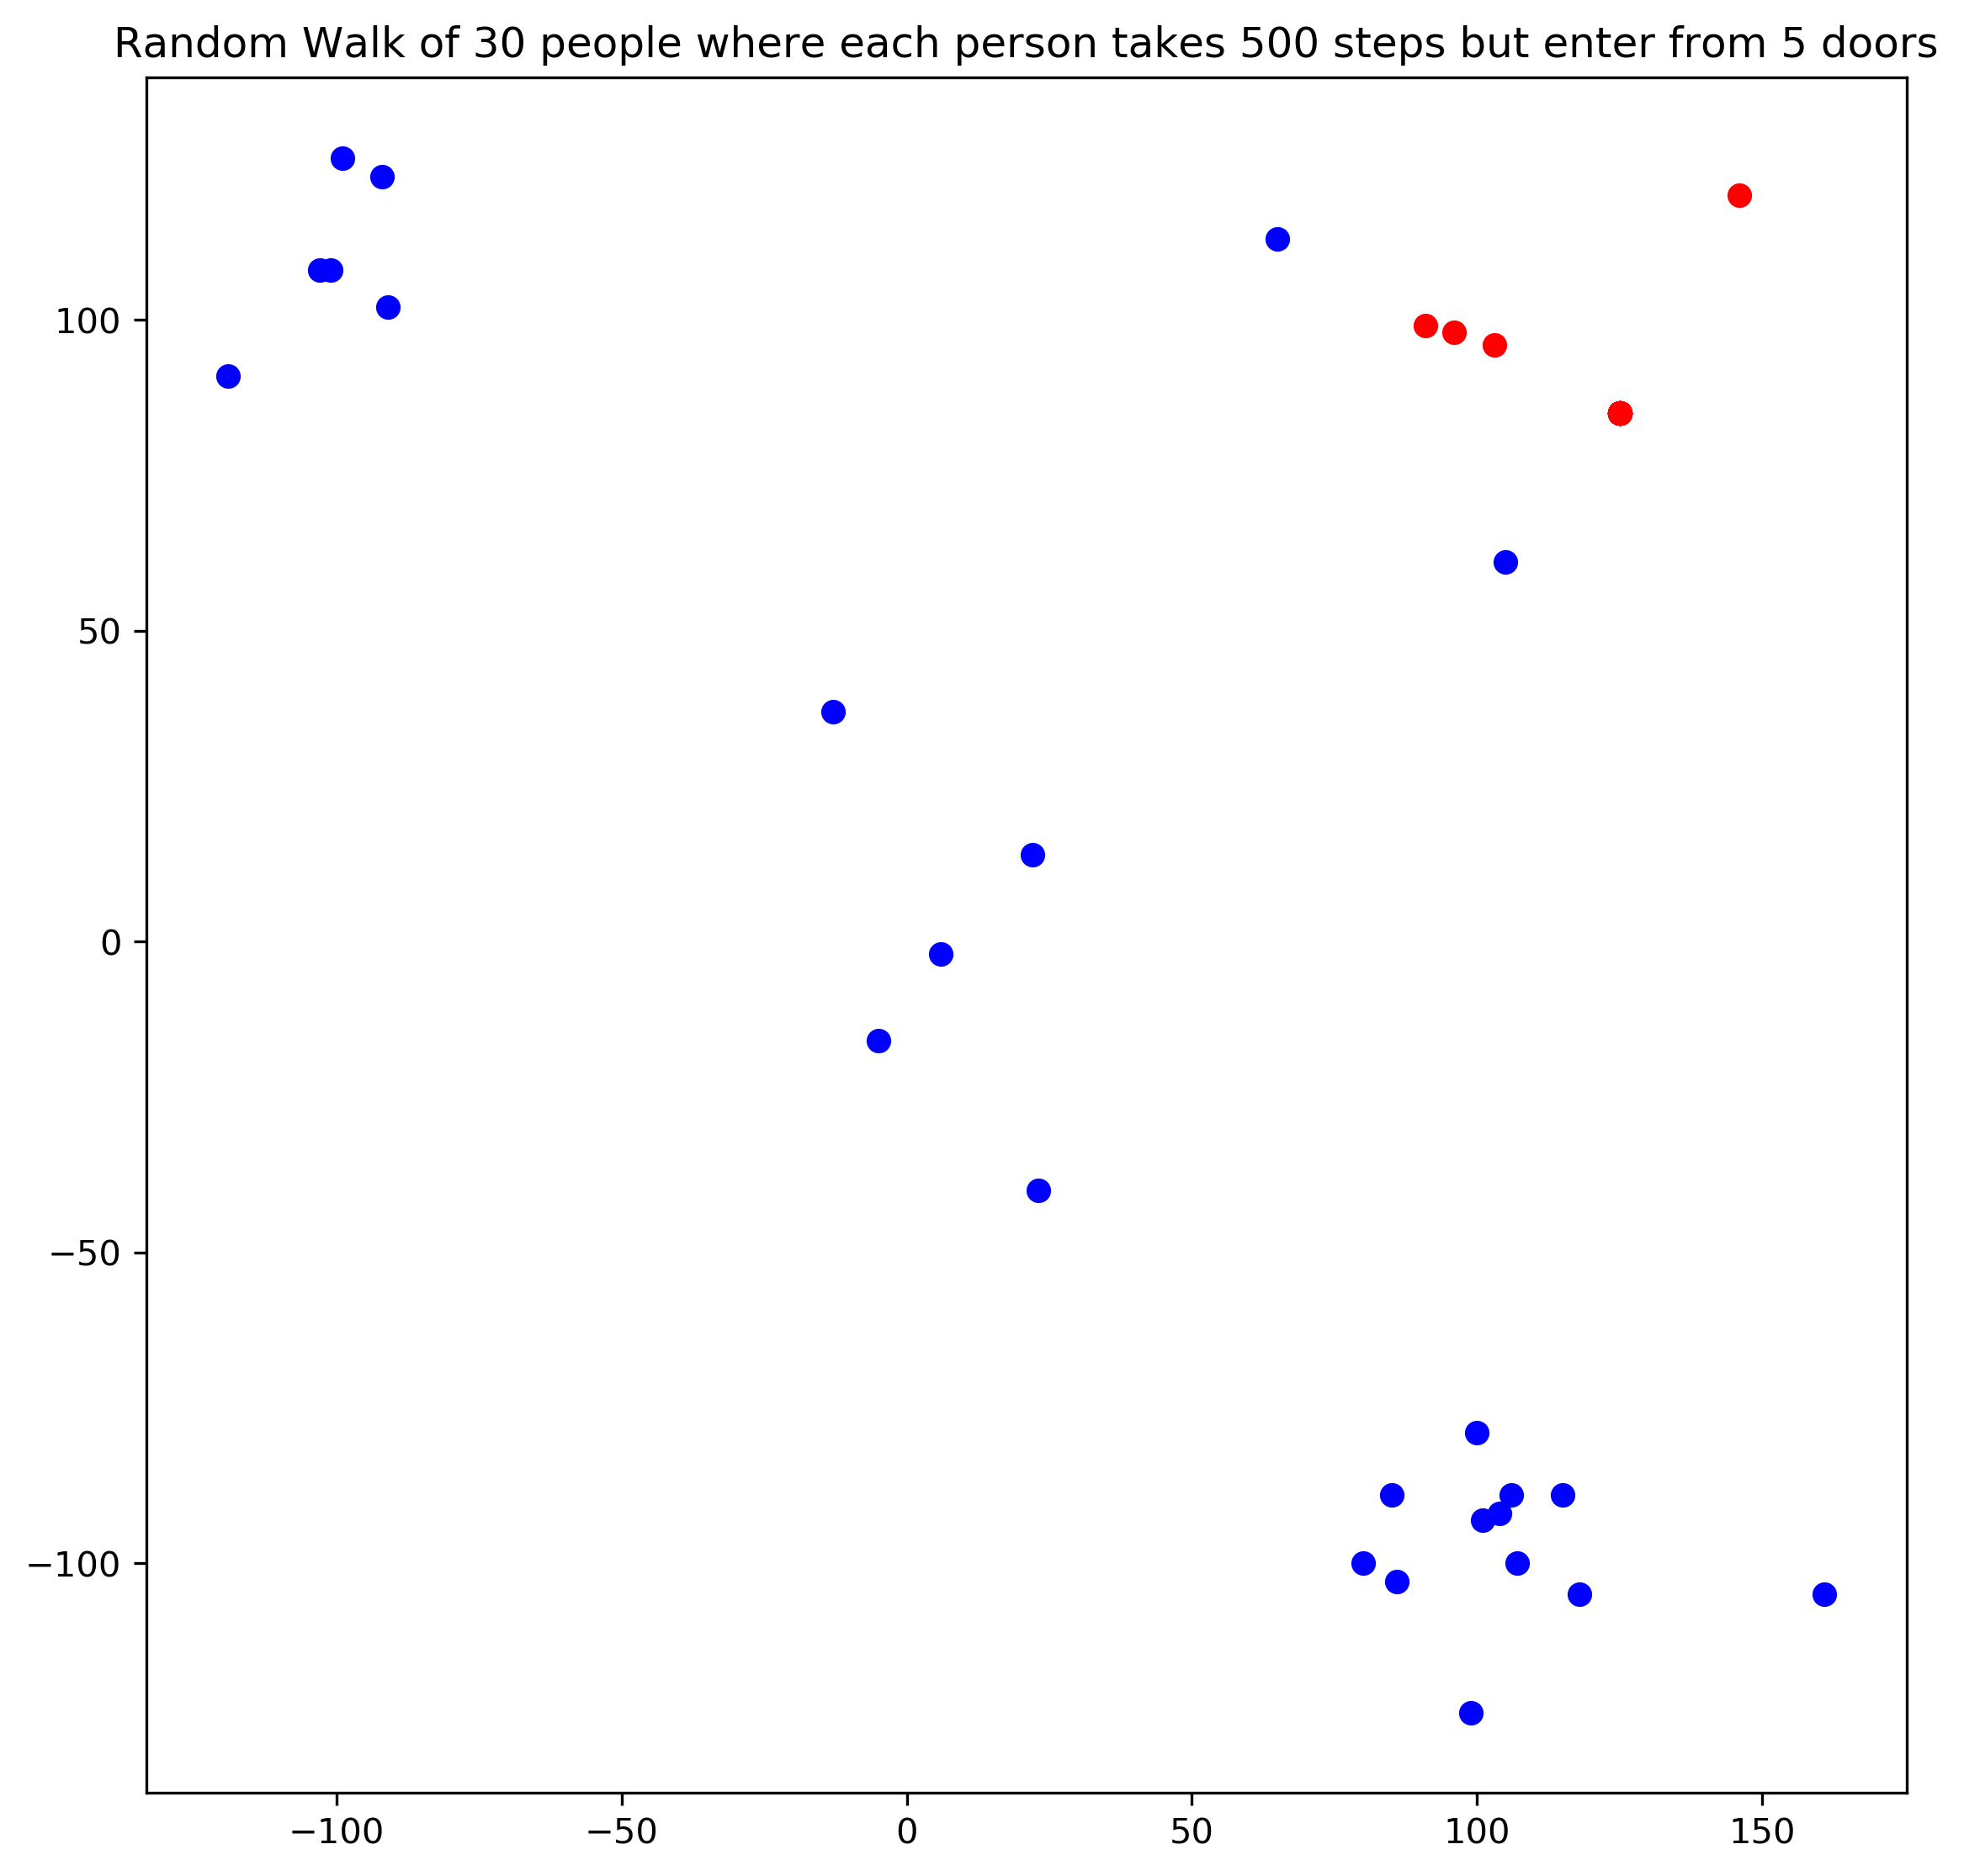

In [5]:
# Set up required variables for simulating 30 people in 500 x 500 space

dims = 2                   # Employees move in 2D space
step_n = 500                # Test for 500 steps per employee
employees = 30             # Test for 150 employees
step_set = [-1, 0, 1]       

origin = np.zeros((1,dims))

all_steps = np.zeros((step_n+1)*dims*employees).reshape((step_n+1,dims,employees))  # captures all steps

# Simulate the movement in a day in office


for i in range(employees):
   

    # Choose a origin point. The next 3 lines of code simluate 5 entry points in a 500 x 500 space
    #entry_points = np.array([[0,0],[250,250],[250,-250],[-250,250],[-250,-250]])
    entry_points = np.array([[0,0],[100,100],[100,-100],[-100,100],[-100,-100]])
    entry_index = np.random.randint(0,4)
    origin = np.reshape(entry_points[entry_index],(-1,2))
    #x_origin = np.random.randint(-250,250)
    #y_origin = np.random.randint(-250,250)
    #origin = np.array([[x_origin,y_origin]])
    
    # Set origin to (0,0) i.e all people enter from the same door
    #origin = np.array([[0,0]])
    # simuate movement 
    
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    
    # capture movement for all 30 people in all_steps 3D array
    all_steps[:,:,i] = path

# Plot to see who is infected. Person # 0 was infected. 

# blue dot represents not infected
# red dot represents infected


fig = plt.figure(figsize=(9,9),dpi=300)
plt.title('Random Walk of 30 people where each person takes 500 steps but enter from 5 doors')

for i in range(1,employees):
    ax = fig.add_subplot(111)
    ax.scatter(all_steps[-1,0,0], all_steps[-1,1,0],c='red',marker = 'o')
    #if i==0:
        #ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='red',marker = 'o')
    #for j in range(1,employees):
        #if i != j:
    infected = check_intersection1(all_steps[:,:,0],all_steps[:,:,i])
            
    if infected:
        ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='red',marker = 'o')
    else:
        ax.scatter(all_steps[-1,0,i], all_steps[-1,1,i],c='blue',marker = 'o')
    





As you can see the number of infections has dropped if people enter from 5 different doors.

